# Blood Glucose Control - EDA

**Name:** Ridhika Madan



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD.

In [152]:
# Importing datasets into pandas dataframes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_patient_1 = pd.read_csv('https://raw.githubusercontent.com/RobotPsychologist/bg_control/refs/heads/main/data/gluroo_500030.csv')
df_patient_2 = pd.read_csv('https://raw.githubusercontent.com/RobotPsychologist/bg_control/refs/heads/main/data/gluroo_679372.csv')
df_patient_1['date'] = pd.to_datetime(df_patient_1['date'], format='ISO8601')
df_patient_2['date'] = pd.to_datetime(df_patient_2['date'], format='ISO8601')


In [153]:
# Adding dataset identifier column to each dataframe then merging them
df_patient_1['patient_number'] = '500030'
df_patient_2['patient_number'] = '679372'
df = pd.concat([df_patient_1, df_patient_2], ignore_index=True)
#print(df.head)

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet.

#Hypoglycemia vs Hyperglycemia: Analysing Which Each Patient is More Prone to Prior to Further Analysis


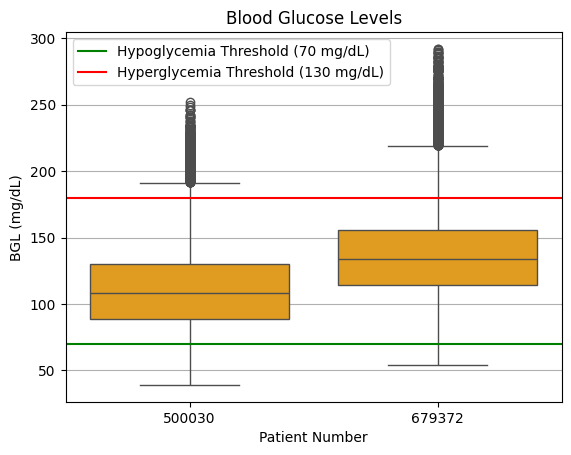

In [154]:
sns.boxplot(x='patient_number', y='bgl', data=df, color='orange')
plt.axhline(70, color='green', label='Hypoglycemia Threshold (70 mg/dL)')
plt.axhline(180, color='red', label='Hyperglycemia Threshold (130 mg/dL)')

plt.title('Blood Glucose Levels')
plt.xlabel('Patient Number')
plt.ylabel('BGL (mg/dL)')
plt.legend()
plt.grid(axis='y')
plt.show()

Based on the boxplot, Patient 1 has a greater tendency towards hypoglycemia, whereas patient 2 has a greater tendency for hyperglycemia.

# Analysing Evolution of BGL Throughout The Day for Each Patient

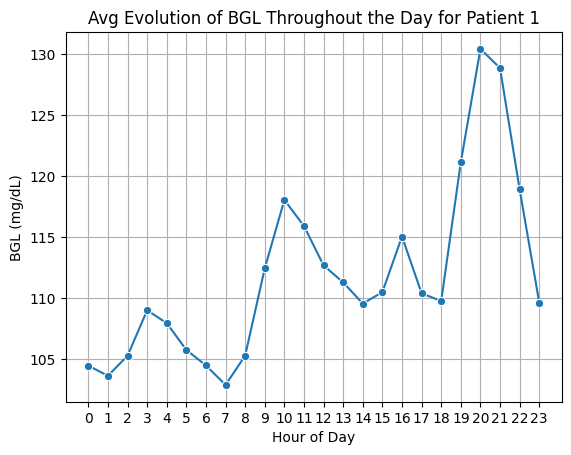

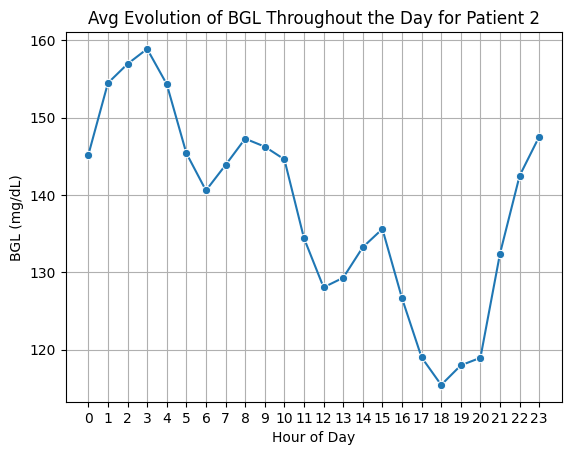

In [155]:
df_patient_1['hour'] = df_patient_1['date'].dt.hour
bgl_by_hour_patient_1 = df_patient_1.groupby('hour')['bgl'].mean().reset_index()
sns.lineplot(data=bgl_by_hour_patient_1, x='hour', y='bgl', marker='o')
plt.title('Avg Evolution of BGL Throughout the Day for Patient 1')
plt.xlabel('Hour of Day')
plt.ylabel('BGL (mg/dL)')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

df_patient_2['hour'] = df_patient_2['date'].dt.hour
bgl_by_hour_patient_2 = df_patient_2.groupby('hour')['bgl'].mean().reset_index()
sns.lineplot(data=bgl_by_hour_patient_2, x='hour', y='bgl', marker='o')
plt.title('Avg Evolution of BGL Throughout the Day for Patient 2')
plt.xlabel('Hour of Day')
plt.ylabel('BGL (mg/dL)')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

 Understanding how their Blood Glucose Level fluctuates throughout the day on average can be critical for patients to understand how well they are managing their diabetes currently and if there are certain times of the day they need to pay more attention to/make modifications to their existing treatment plan. For Patient 1, there is a sudden surge in BGL in the evening between 6 and 11 pm. This could possibly be due to a high carbohydrate meal in the evening or due to delayed action of rapid acting insulin. For Patient 2, BGL peaks between 8 pm and 6 am; this could potentially be attributed to the [dawn phenomenon](https://www.mayoclinic.org/diseases-conditions/diabetes/expert-answers/dawn-effect/faq-20057937).

#Analysing Distribution of Out of Target BGL Values for Each Patient by Time of Day
 This could help identify if there is a correlation between abnormal BGL values and time of day, which could potentially guide us towards possible causal factors for BGL outside the target range.

##Analysing Distribution of Out-of-Target BGL Values for Patient 1 By Hour of Day

In [156]:
# The BGL may have been measured by a monitor or finger prick.
fp_bgl_patient_1_count = df_patient_1[df_patient_1['fp_bgl'].notnull()].shape[0]
print(fp_bgl_patient_1_count)

24


<ipython-input-157-58f1c56991e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_target_patient_1['hour'] = above_target_patient_1['date'].dt.hour
<ipython-input-157-58f1c56991e5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  below_target_patient_1['hour'] = below_target_patient_1['date'].dt.hour


Text(0, 0.5, 'Frequency')

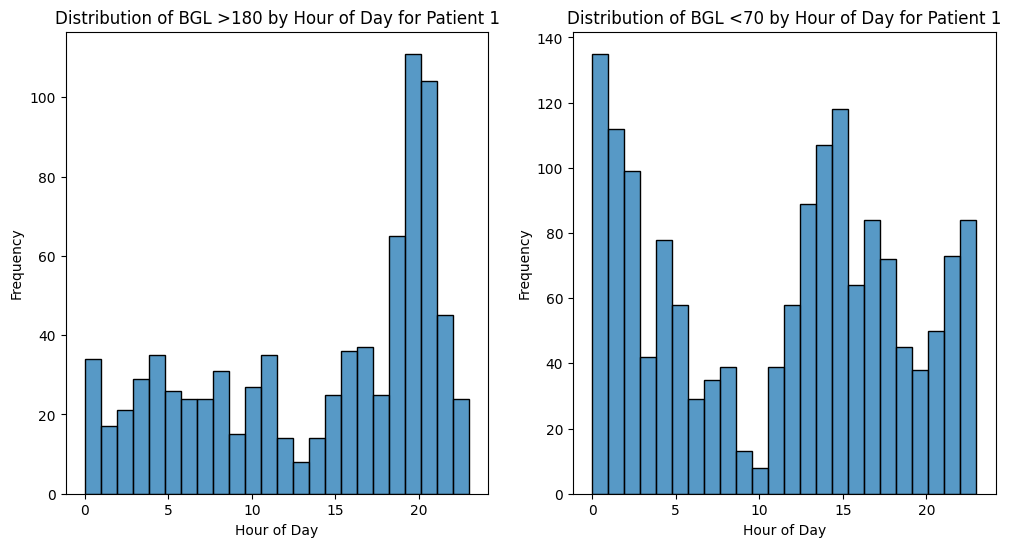

In [157]:
# For patient 1, since fp_bgl readings are small compared to the overall dataset these can be ignored for now.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
above_target_patient_1 = df_patient_1[(df_patient_1['bgl'] > 180)]
above_target_patient_1['hour'] = above_target_patient_1['date'].dt.hour
sns.histplot(above_target_patient_1['hour'], bins = 24, ax=axes[0])

axes[0].set_title('Distribution of BGL >180 by Hour of Day for Patient 1')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Frequency')

below_target_patient_1 = df_patient_1[(df_patient_1['bgl'] < 70)]
below_target_patient_1['hour'] = below_target_patient_1['date'].dt.hour
sns.histplot(below_target_patient_1['hour'], bins = 24, ax=axes[1])

axes[1].set_title('Distribution of BGL <70 by Hour of Day for Patient 1')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Frequency')



Patient 1 has a more consistent distribution and higher prevalence of low BGL values. Low BGL tends to peak in the early hours of morning, on the contrary, instances of high BGL tend to peak around in the evening 8 pm.

##Analysing Distribution of Out-of-Target BGL Values for Patient 2 By Hour of Day

In [158]:
# The BGL may have been measured by a monitor or finger prick.
fp_bgl_patient_2_count = df_patient_2[df_patient_2['fp_bgl'].notnull()].shape[0]
print(fp_bgl_patient_2_count)

7


<ipython-input-159-538eab20a90d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_target_patient_2['hour'] = above_target_patient_2['date'].dt.hour
<ipython-input-159-538eab20a90d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  below_target_patient_2['hour'] = below_target_patient_2['date'].dt.hour


Text(0, 0.5, 'Frequency')

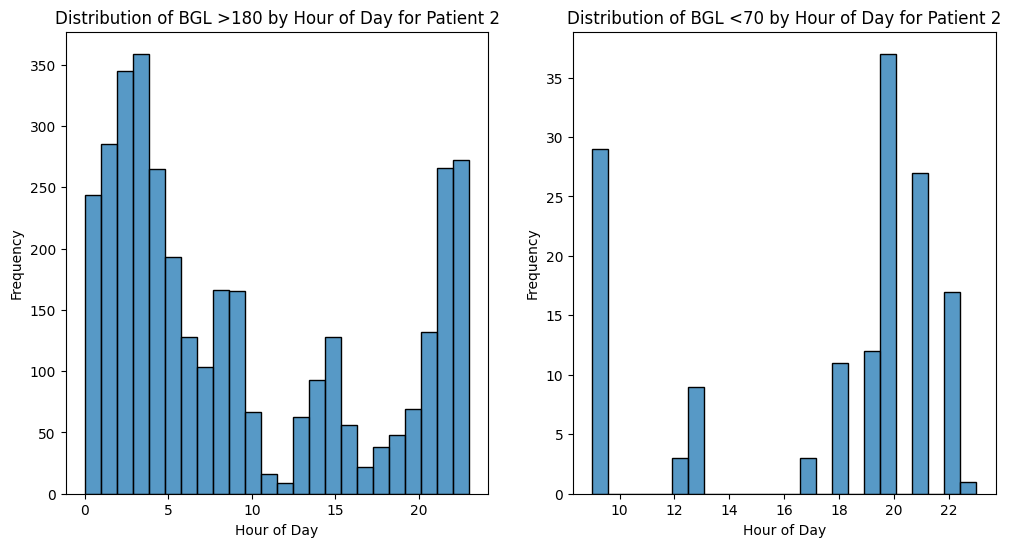

In [159]:
# For patient 2, since fp_bgl readings are small compared to the overall dataset these can be ignored for now.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
above_target_patient_2 = df_patient_2[(df_patient_2['bgl'] > 180)]
above_target_patient_2['hour'] = above_target_patient_2['date'].dt.hour
sns.histplot(above_target_patient_2['hour'], bins = 24, ax=axes[0])

axes[0].set_title('Distribution of BGL >180 by Hour of Day for Patient 2')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Frequency')

below_target_patient_2 = df_patient_2[(df_patient_2['bgl'] < 70)]
below_target_patient_2['hour'] = below_target_patient_2['date'].dt.hour
sns.histplot(below_target_patient_2['hour'], bins = 24, ax=axes[1])

axes[1].set_title('Distribution of BGL <70 by Hour of Day for Patient 2')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Frequency')


For Patient 2, BGL falls above target values predominantly late at night between the hours of 9 pm - 6 am. This might be explained by the **Dawn phenomenon**. Incidents of hypoglycemia are sparsely distributed.



# Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.*

1. Is there a difference between BGL readings via glucose monitor versus finger prick in the data?
2. What other commonalities could exist between out-of-target blood glucose level values? Could causal factors be determined from these?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future.

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`